# Laboration - Covid-19



## Setup

In [1]:
import pandas as pd
import plotly_express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Swedish C19 data
c19sweden = pd.read_excel(
    "Folkhalsomyndigheten_Covid19.xlsx",
    sheet_name="Veckodata Riket"
)

## 1a) Överblick över data

- veckonummerkolumnen nollställs vid årsskifte

- 13 kolumner och 89 rader, mestadels int, men två har floats

- Kolumnnamn:

['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv']

In [72]:
c19sweden.iloc[45:55]
c19sweden.tail()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv,vecka
84,2021,37,6266,60,137,1145764,11039,24,7823,52,5.0,14807,1426.599976,2021v37
85,2021,38,4298,41,101,1150062,11080,21,7844,40,3.9,14847,1430.400024,2021v38
86,2021,39,4241,41,82,1154303,11121,17,7861,37,3.6,14884,1434.000000,2021v39
87,2021,40,4141,40,81,1158444,11161,15,7876,42,4.0,14926,1438.099976,2021v40
88,2021,41,4062,39,79,1162506,11200,10,7886,18,1.7,14944,1439.800049,2021v41


In [4]:
c19sweden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              89 non-null     int64  
 1   veckonummer                     89 non-null     int64  
 2   Antal_fall_vecka                89 non-null     int64  
 3   Antal_fall_100000inv_vecka      89 non-null     int64  
 4   Antal_fall_100000inv_14dagar    89 non-null     int64  
 5   Kum_antal_fall                  89 non-null     int64  
 6   Kum_fall_100000inv              89 non-null     int64  
 7   Antal_nyaintensivvårdade_vecka  89 non-null     int64  
 8   Kum_antal_intensivvårdade       89 non-null     int64  
 9   Antal_avlidna_vecka             89 non-null     int64  
 10  Antal_avlidna_milj_inv_vecka    89 non-null     float64
 11  Kum_antal_avlidna               89 non-null     int64  
 12  Kum_antal_avlidna_milj_inv      89 non

In [5]:
c19sweden.columns

Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv'],
      dtype='object')

## 1b) Slå ihop år och veckonummer

Så att det står ÅR v VECKONUMMER: "2020v12"

In [6]:
c19sweden["vecka"] = c19sweden["år"].astype(str) + "v" + c19sweden["veckonummer"].astype(str)

# Check
c19sweden["vecka"]

0      2020v6
1      2020v7
2      2020v8
3      2020v9
4     2020v10
       ...   
84    2021v37
85    2021v38
86    2021v39
87    2021v40
88    2021v41
Name: vecka, Length: 89, dtype: object

## 1c-f) Rita diagram

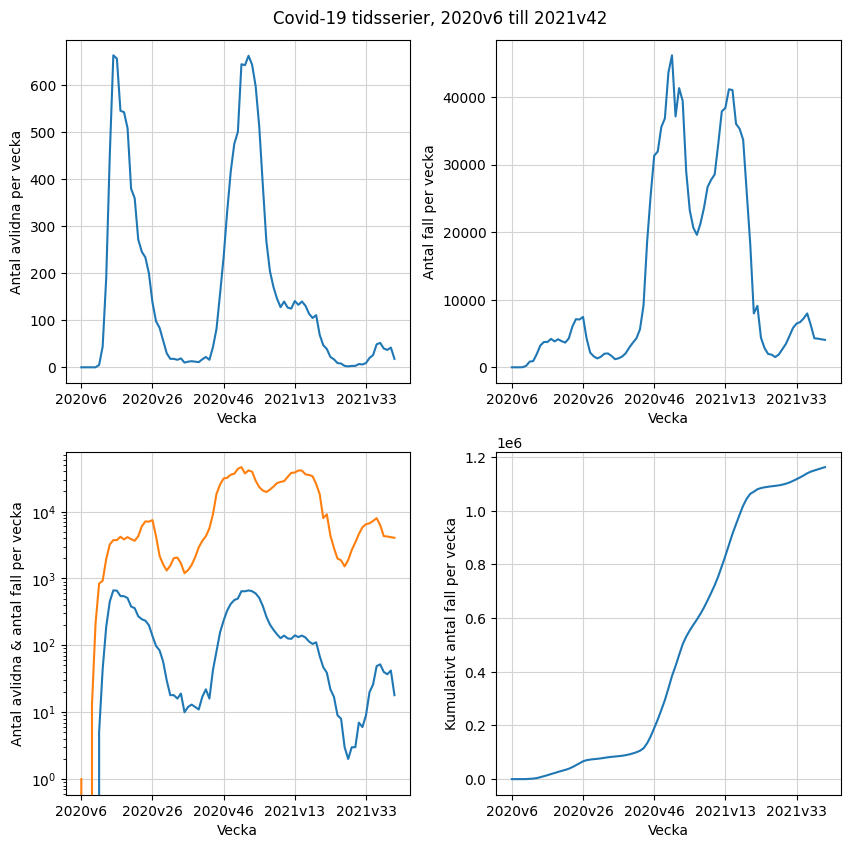

In [84]:
# With seaborn

# Define a plot function (move to a separate py-file later?)
def snsline(data, xparam, yparam, xlabel, ylabel, ax):
    # General plot settings
    ax.set(ylabel=ylabel, xlabel=xlabel)
    ax.set_xticks(list(range(0,len(c19sweden[xparam]),20)))
    ax.grid(color="lightgray")
    plt.subplots_adjust(wspace = 0.25)

    # Plot code
    sns.lineplot(
        data=data,
        x=xparam, y=yparam,
        ax=ax
    )

# Set up of subplots and other settings
fig,ax = plt.subplots(
    2,2, 
    dpi=100,
    figsize=(10,10)
)
fig.suptitle("Covid-19 tidsserier, 2020v6 till 2021v42",y=0.91)
fig.set_facecolor("white")

# Lists with plot parameters and plot labels
xparam = "vecka"

yparams = [
    "Antal_avlidna_vecka",
    "Antal_fall_vecka",
   ["Antal_avlidna_vecka","Antal_fall_vecka"],
    "Kum_antal_fall"
]

xlabel = "Vecka"
ylabels = [
    "Antal avlidna per vecka",
    "Antal fall per vecka",
    "Antal avlidna & antal fall per vecka",
    "Kumulativt antal fall per vecka"
]

# So this will plots
# 1c avlidna fall per vecka, 2020v6 to now
# 1d nya fall per vecka, 2020v6 to now.
# 1e avlidna fall per vecka & nya fall per vecka, 2020v6 to now
# 1f kumulativt antal fall, 2020v6 to now

for n in range(ax.size):
    subp_coord = (n//2,(n-2)%2) # Gives 0,0 ; 0,1 ; 1,0 ; and 1,1

    if len(yparams[n]) == 2:
        snsline(c19sweden, xparam, yparams[n][0], xlabel, ylabels[n], ax[subp_coord])
        snsline(c19sweden, xparam, yparams[n][1], xlabel, ylabels[n], ax[subp_coord])
        ax[subp_coord].set_yscale("log")
    else:
        snsline(c19sweden, xparam, yparams[n], xlabel, ylabels[n], ax[subp_coord])

# save figure: 1cdef_seaborn.png
fig.savefig("visualiseringar/1cdef_seaborn.png")


In [103]:
# With plotly express


# So this will plots
# 1c avlidna fall per vecka, 2020v6 to now
# 1d nya fall per vecka, 2020v6 to now.
# 1e avlidna fall per vecka & nya fall per vecka, 2020v6 to now
# 1f kumulativt antal fall, 2020v6 to now
"""
for n in range(4):
    #if len(yparams[n]) == 2:
    #    ylabel


    fig = px.line(
        c19sweden, x=xparam, y=yparams[n],
    )
    fig.show()
"""

# TODO: lös mina fina labels till figuren

fig = px.line(
    c19sweden, x=xparam, y=yparams[2],
    labels = {yparams[2][0]:"Antal avlidna", yparams[2][1]:"antal fall per vecka"}
)
fig.show()
#labels={xparam:xlabel, yparams[n]:ylabels[n]}

"""
# Lists with plot parameters and plot labels
xparam = "vecka"

yparams = [
    "Antal_avlidna_vecka",
    "Antal_fall_vecka",
   ["Antal_avlidna_vecka","Antal_fall_vecka"],
    "Kum_antal_fall"
]

xlabel = "Vecka"
ylabels = [
    "Antal avlidna per vecka",
    "Antal fall per vecka",
    "Antal avlidna & antal fall per vecka",
    "Kumulativt antal fall per vecka"
]
""";


In [102]:
(yparams[2][0],yparams[2][1])

('Antal_avlidna_vecka', 'Antal_fall_vecka')